In [134]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [135]:
X_train = np.loadtxt(r'/Users/sumanthpagadala/Desktop/code/DeepLearning/DATA/animal_recognition/input.csv', delimiter=',')
y_train = np.loadtxt(r'/Users/sumanthpagadala/Desktop/code/DeepLearning/DATA/animal_recognition/labels.csv', delimiter=',')
X_test = np.loadtxt(r'/Users/sumanthpagadala/Desktop/code/DeepLearning/DATA/animal_recognition/input_test.csv', delimiter=',')
y_test = np.loadtxt(r'/Users/sumanthpagadala/Desktop/code/DeepLearning/DATA/animal_recognition/labels_test.csv', delimiter=',')

In [136]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
y_train = y_train.reshape(len(y_train), 1)
X_test = X_test.reshape(len(X_test), 100, 100, 3)
y_test = y_test.reshape(len(y_test), 1)

X_train=X_train/255.0
X_test = X_test/255.0

In [137]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(2000, 100, 100, 3)
(2000, 1)
(400, 100, 100, 3)
(400, 1)


In [138]:
X_train[1:]

array([[[[0.51372549, 0.50196078, 0.52941176],
         [0.62745098, 0.61568627, 0.64313725],
         [0.77647059, 0.75294118, 0.8       ],
         ...,
         [0.98039216, 0.97647059, 0.96862745],
         [1.        , 1.        , 0.99215686],
         [0.98039216, 0.97647059, 0.96078431]],

        [[0.54901961, 0.5372549 , 0.56470588],
         [0.49803922, 0.48627451, 0.51372549],
         [0.47058824, 0.44705882, 0.48627451],
         ...,
         [0.98431373, 0.99215686, 0.98823529],
         [0.99607843, 1.        , 0.99215686],
         [0.99607843, 1.        , 0.98431373]],

        [[0.8       , 0.79215686, 0.81176471],
         [0.73333333, 0.7254902 , 0.74509804],
         [0.57647059, 0.55686275, 0.58039216],
         ...,
         [0.97647059, 1.        , 1.        ],
         [0.93333333, 0.96862745, 0.94901961],
         [0.90980392, 0.94509804, 0.9254902 ]],

        ...,

        [[0.68235294, 0.71372549, 0.76470588],
         [0.6745098 , 0.70588235, 0.75686275]

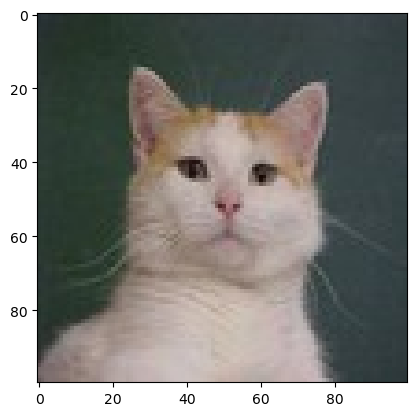

In [139]:
idx=random.randint(0, len(X_train))
plt.imshow(X_train[idx])

In [140]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])



In [141]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [142]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
model.fit(x=X_train, y=y_train, epochs=25, batch_size=64, validation_data=(X_test, y_test),callbacks=[early_stop])

Epoch 1/25
32/32 [==============================] - 2s 69ms/step - loss: 0.7462 - accuracy: 0.4960 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 2/25
32/32 [==============================] - 2s 66ms/step - loss: 0.6886 - accuracy: 0.5015 - val_loss: 0.6885 - val_accuracy: 0.5500
Epoch 3/25
32/32 [==============================] - 2s 66ms/step - loss: 0.6841 - accuracy: 0.5690 - val_loss: 0.6900 - val_accuracy: 0.5325
Epoch 4/25
32/32 [==============================] - 2s 69ms/step - loss: 0.6733 - accuracy: 0.5750 - val_loss: 0.6611 - val_accuracy: 0.5975
Epoch 5/25
32/32 [==============================] - 2s 66ms/step - loss: 0.6510 - accuracy: 0.5985 - val_loss: 0.6494 - val_accuracy: 0.6025
Epoch 6/25
32/32 [==============================] - 2s 67ms/step - loss: 0.6223 - accuracy: 0.6640 - val_loss: 0.6171 - val_accuracy: 0.6550
Epoch 7/25
32/32 [==============================] - 2s 67ms/step - loss: 0.5900 - accuracy: 0.6870 - val_loss: 0.6052 - val_accuracy: 0.6725
Epoch 8/25
32

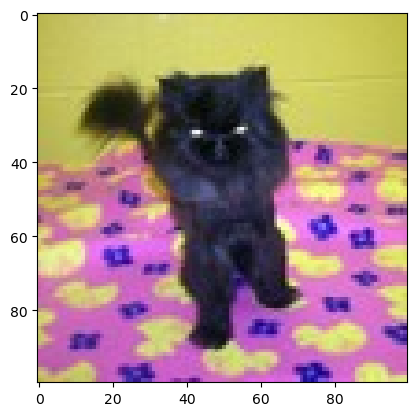

1/1 [==============================] - 0s 12ms/step
Our model says it is a : dog


In [157]:
idx2 = random.randint(0, len(y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is a :", pred)